In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
import types
from ibm_botocore.client import Config
import ibm_boto3

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_7886d8c8664241c895087c06d064eb78 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='cy-2q5tup0tP3TZRDA6jrLrjlk5N8AN4bklltWHrACzV',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_7886d8c8664241c895087c06d064eb78.get_object(Bucket='housepricesadvancedregressiontech-donotdelete-pr-xspbt29nepkblo',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df.shape

(1460, 81)

# Target Analysis. 
## Target = SalePrice column

In [5]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

[Text(0,0.5,'Number'),
 Text(0.5,0,'Sale Price'),
 Text(0.5,1,'Histogram of Sale Price')]

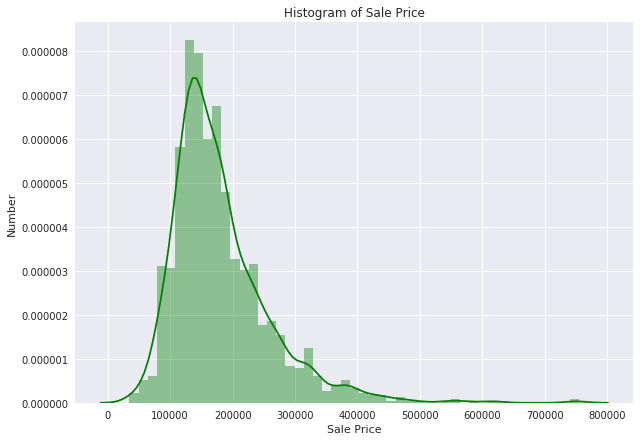

In [6]:
# Create a histogram to view skewness.
x = df['SalePrice']

plt.figure(figsize=(10,7))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
sns.set(font_scale = 1)
ax = sns.distplot(x, color='green')
ax.set(ylabel='Number', 
       xlabel='Sale Price', 
       title='Histogram of Sale Price')

[Text(0,0.5,'Number'),
 Text(0.5,0,'Sale Price'),
 Text(0.5,1,'Kernel Density of Sale Price')]

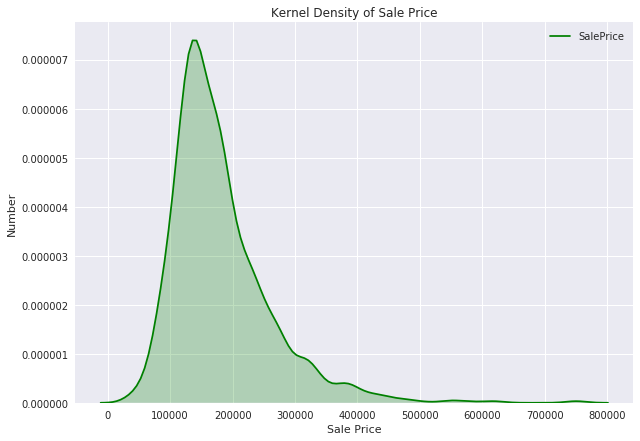

In [7]:
# Create a Kernel Density Plot to view skewness.
x = df['SalePrice']

plt.figure(figsize=(10,7))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
sns.set(font_scale = 1)
ax = sns.kdeplot(x, shade=True, color='green')
ax.set(ylabel='Number', 
       xlabel='Sale Price', 
       title='Kernel Density of Sale Price')

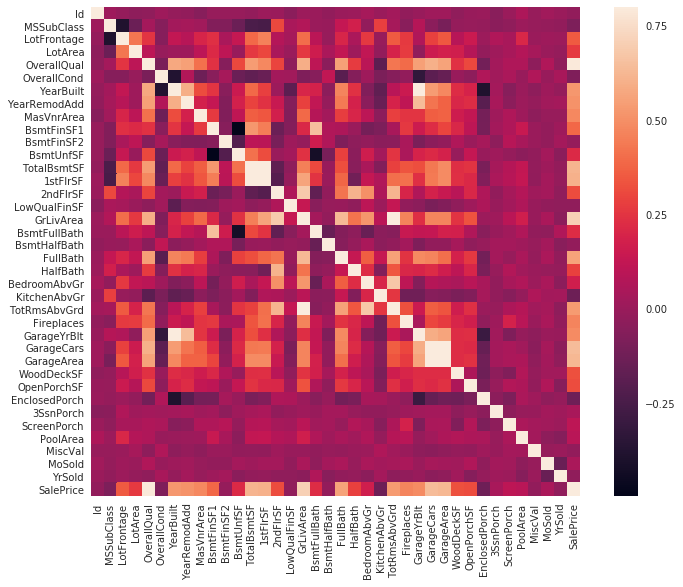

In [8]:
#correlation heatmap
corrmap = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmap, vmax=.8, square=True);

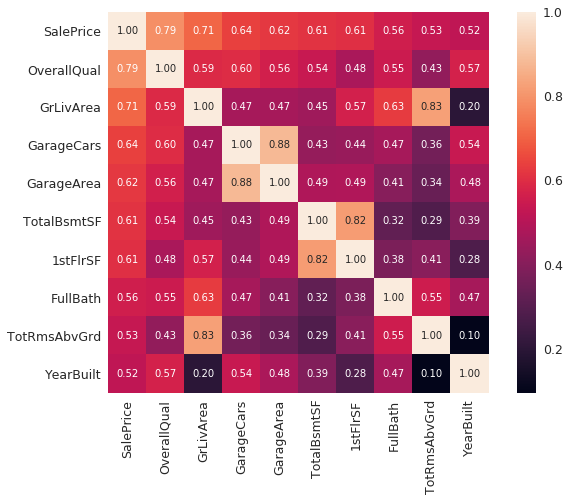

In [9]:
# Create a heatmap with the top 10 variables with the highest correlation with SalePrice
k = 10 #number of variables for heatmap
cols = corrmap.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(10,7))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

- 'OverallQual', 'GrLivArea', and 'TotalBsmtSF' were strongly correlated with SalePrice. 
- 'GarageCars' and 'GarageArea' were also strongly correlated, however they are basically the same variable. The number of cars that fit in your garage will directl affect the area of your garage. 

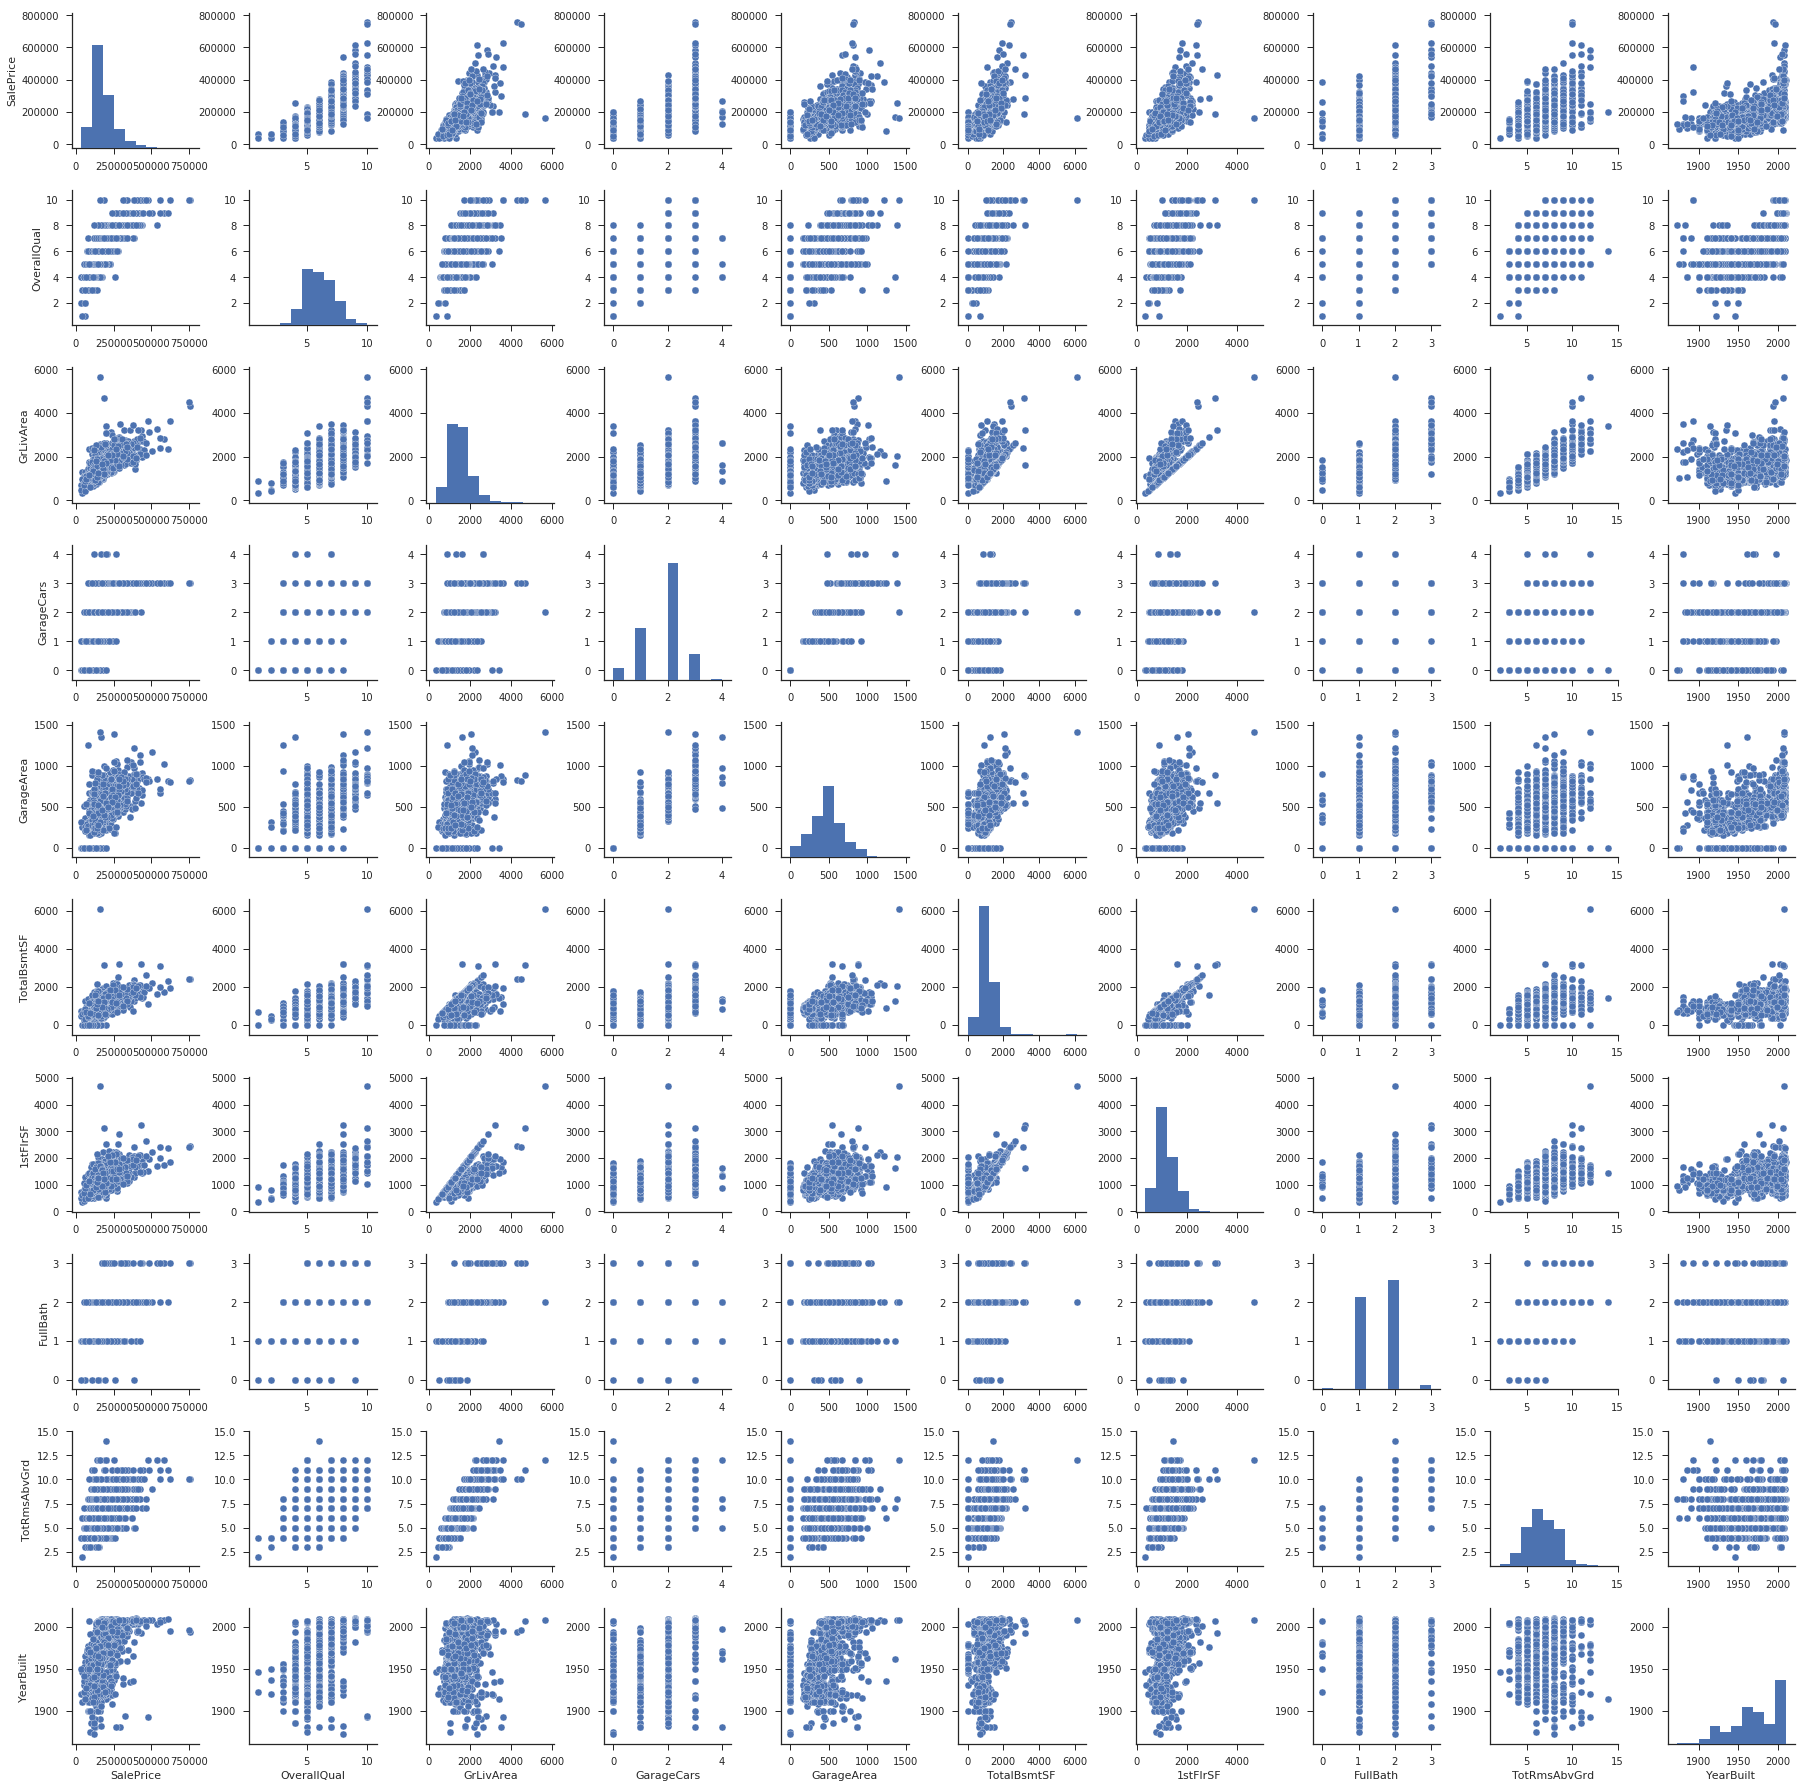

In [10]:
# create pairplots with the strongest correlated variables.
var = ['SalePrice', 'OverallQual','GrLivAres','GarageArea',
       'TotalBsmtSF','1stFlrSF','FullBath','TotRmAbvGrd','YearBuilt']
sns.set(style='ticks')
sns.pairplot(df[cols])
plt.show()

[Text(0,0.5,'Sale Price'),
 Text(0.5,0,'Overal Quality'),
 Text(0.5,1,'Sale Price and Overal Quality')]

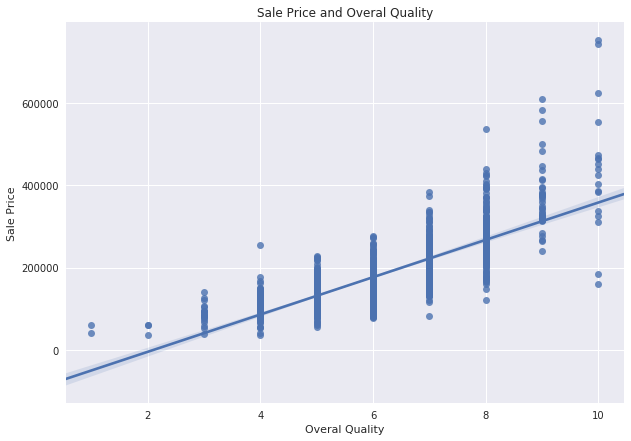

In [11]:
sns.set(color_codes=True)
plt.figure(figsize=(10,7))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
sns.set(font_scale = 1)
ax = sns.regplot(x='OverallQual', y='SalePrice', data=df)
ax.set(ylabel='Sale Price', 
       xlabel='Overal Quality', 
       title='Sale Price and Overal Quality')

[Text(0,0.5,'Sale Price'),
 Text(0.5,0,'Above Ground Living Area'),
 Text(0.5,1,'Sale Price and Living Area')]

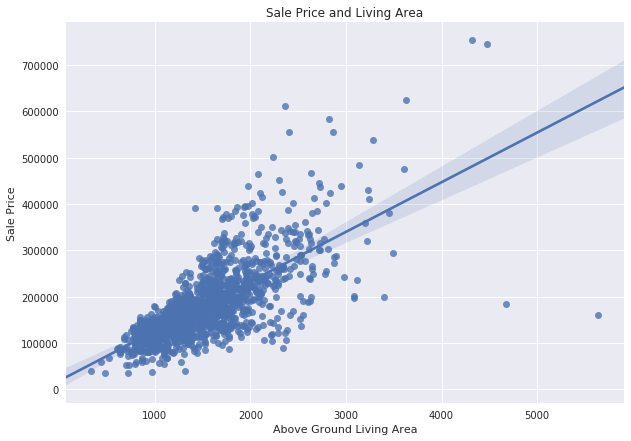

In [12]:
sns.set(color_codes=True)
plt.figure(figsize=(10,7))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
sns.set(font_scale = 1)
ax = sns.regplot(x='GrLivArea', y='SalePrice', data=df)
ax.set(ylabel='Sale Price', 
       xlabel='Above Ground Living Area', 
       title='Sale Price and Living Area')

The two points at the bottom right have large living areas and low sale prices. I am going to drop these two outliers for modeling later. 

In [13]:
# Delete the two outliers mentioned above. 
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<200000)].index)

[Text(0,0.5,'Sale Price'),
 Text(0.5,0,'Above Ground Living Area'),
 Text(0.5,1,'Sale Price and Living Area')]

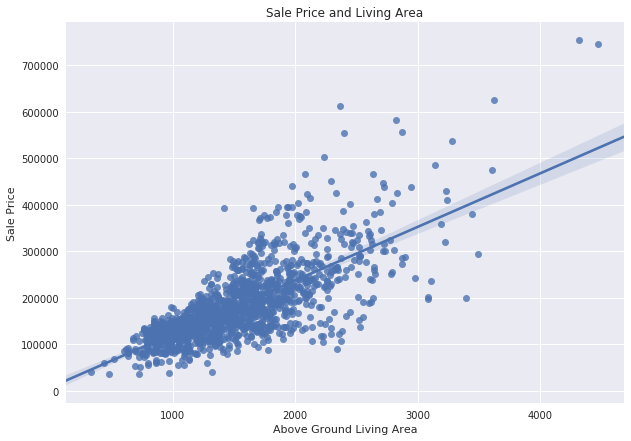

In [14]:
# Check and make sure the outliers are gone.
sns.set(color_codes=True)
plt.figure(figsize=(10,7))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
sns.set(font_scale = 1)
ax = sns.regplot(x='GrLivArea', y='SalePrice', data=df)
ax.set(ylabel='Sale Price', 
       xlabel='Above Ground Living Area', 
       title='Sale Price and Living Area')

[Text(0,0.5,'Sale Price'),
 Text(0.5,0,'Area of Garage'),
 Text(0.5,1,'Sale Price and Garage Size')]

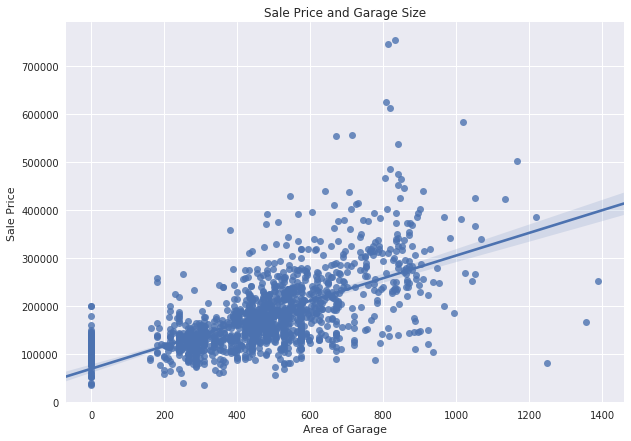

In [15]:
sns.set(color_codes=True)
plt.figure(figsize=(10,7))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
sns.set(font_scale = 1)
ax = sns.regplot(x='GarageArea', y='SalePrice', data=df)
ax.set(ylabel='Sale Price', 
       xlabel='Area of Garage', 
       title='Sale Price and Garage Size')

[Text(0,0.5,'Sale Price'),
 Text(0.5,0,'Area of Basement'),
 Text(0.5,1,'Sale Price and Basement Size')]

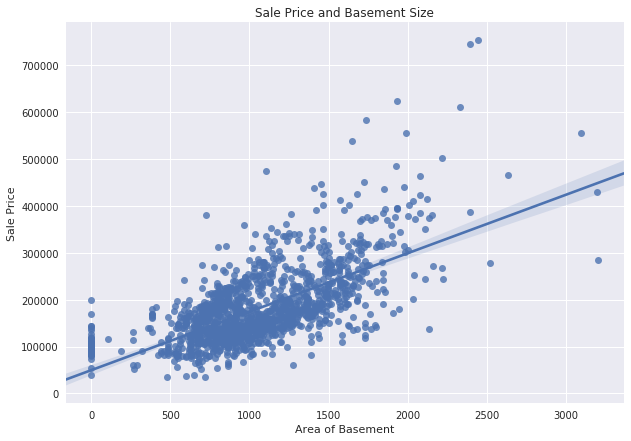

In [16]:
sns.set(color_codes=True)
plt.figure(figsize=(10,7))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
sns.set(font_scale = 1)
ax = sns.regplot(x='TotalBsmtSF', y='SalePrice', data=df)
ax.set(ylabel='Sale Price', 
       xlabel='Area of Basement', 
       title='Sale Price and Basement Size')

In [17]:
df['YearBuilt'].min()

1872

In [18]:
df['YearBuilt'].max()

2010

In [19]:
# Change YearBuilt into decades in order to plot it out easier

def construction_decade(row):
    if row['YearBuilt'] >= 1870 and row['YearBuilt'] < 1880:
        return '1870'
    elif row['YearBuilt'] >= 1880 and row['YearBuilt'] < 1890:
        return '1880'
    elif row['YearBuilt'] >= 1890 and row['YearBuilt'] < 1900:
        return '1890'
    elif row['YearBuilt'] >= 1900 and row['YearBuilt'] < 1910:
        return '1900'
    elif row['YearBuilt'] >= 1910 and row['YearBuilt'] < 1920:
        return '1910'
    elif row['YearBuilt'] >= 1920 and row['YearBuilt'] < 1930:
        return '1920'
    elif row['YearBuilt'] >= 1930 and row['YearBuilt'] < 1940:
        return '1930'
    elif row['YearBuilt'] >= 1940 and row['YearBuilt'] < 1950:
        return '1940'
    elif row['YearBuilt'] >= 1950 and row['YearBuilt'] < 1960:
        return '1950'
    elif row['YearBuilt'] >= 1960 and row['YearBuilt'] < 1970:
        return '1960'
    elif row['YearBuilt'] >= 1970 and row['YearBuilt'] < 1980:
        return '1970'
    elif row['YearBuilt'] >= 1980 and row['YearBuilt'] < 1990:
        return '1980'
    elif row['YearBuilt'] >= 1990 and row['YearBuilt'] < 2000:
        return '1990'
    elif row['YearBuilt'] >= 2000 and row['YearBuilt']:
        return '2000'
    else:
        return '0'
    
df['DecadeBuilt'] = df.apply(lambda row: construction_decade(row), axis=1)

In [20]:
df['DecadeBuilt'].head()

0    2000
1    1970
2    2000
3    1910
4    2000
Name: DecadeBuilt, dtype: object

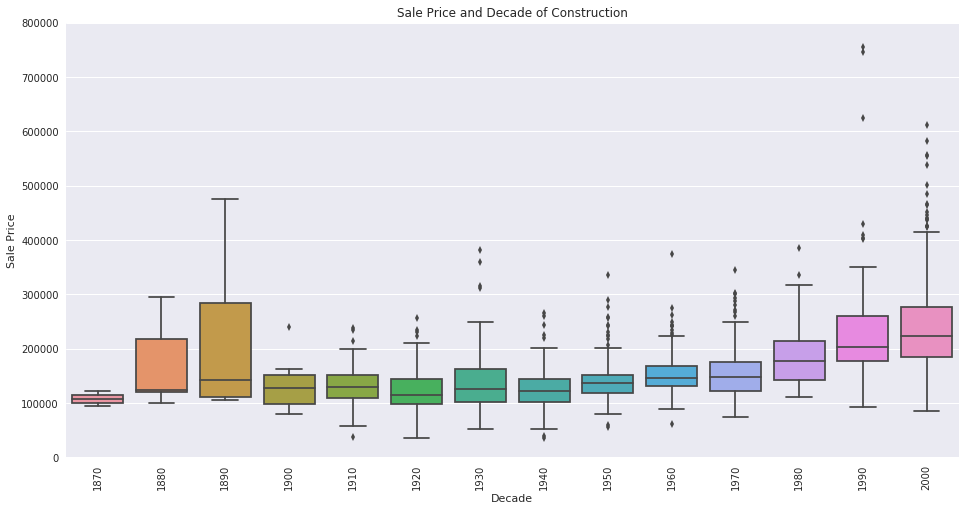

In [21]:
var = 'DecadeBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.boxplot(x=var, y="SalePrice", data=data)
ax.set(ylabel='Sale Price', 
       xlabel='Decade', 
       title='Sale Price and Decade of Construction')
ax.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

# Fix any Missing Data

In [22]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageQual,81,0.055556
GarageCond,81,0.055556
GarageFinish,81,0.055556
GarageType,81,0.055556


#### PoolQC

In [28]:
# View Pool values
df['PoolQC'].unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

In [29]:
# NAN must mean there is no pool. Change NAN to None
df['PoolQC'].fillna('None', inplace=True)

In [30]:
df['PoolQC'].unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

#### MiscFeature

In [31]:
# Check
df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [32]:
# NAN means no extra misc. feature. Change NAN to None
df['MiscFeature'].fillna('None', inplace=True)

In [33]:
# Check
df['MiscFeature'].unique()

array(['None', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

#### Alley

In [34]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [35]:
# NAN probably means no Alley access or an unpaved Alley. I'll change it to None again.
df['Alley'].fillna('None', inplace=True)

In [36]:
# Check
df['Alley'].unique()

array(['None', 'Grvl', 'Pave'], dtype=object)

#### Fence

In [37]:
df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [38]:
# NAN mean no fence, Change to None again. 
df['Fence'].fillna('None', inplace=True)

In [39]:
# Check
df['Fence'].unique()

array(['None', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

#### FireplaceQU

In [40]:
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [41]:
# Again NAN must mean there is no fireplace. Replace NAN with None.
df['FireplaceQu'].fillna('None', inplace=True)

In [42]:
# Check
df['FireplaceQu'].unique()

array(['None', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

#### LotFrontage

In [43]:
df['LotFrontage'].unique()

array([  65.,   80.,   68.,   60.,   84.,   85.,   75.,   nan,   51.,
         50.,   70.,   91.,   72.,   66.,  101.,   57.,   44.,  110.,
         98.,   47.,  108.,  112.,   74.,  115.,   61.,   48.,   33.,
         52.,  100.,   24.,   89.,   63.,   76.,   81.,   95.,   69.,
         21.,   32.,   78.,  121.,  122.,   40.,  105.,   73.,   77.,
         64.,   94.,   34.,   90.,   55.,   88.,   82.,   71.,  120.,
        107.,   92.,  134.,   62.,   86.,  141.,   97.,   54.,   41.,
         79.,  174.,   99.,   67.,   83.,   43.,  103.,   93.,   30.,
        129.,  140.,   35.,   37.,  118.,   87.,  116.,  150.,  111.,
         49.,   96.,   59.,   36.,   56.,  102.,   58.,   38.,  109.,
        130.,   53.,  137.,   45.,  106.,  104.,   42.,   39.,  144.,
        114.,  128.,  149.,  313.,  168.,  182.,  138.,  160.,  152.,
        124.,  153.,   46.])

In [44]:
# NA values must be actual missing data. Group by neighborhood and impute the median LotFrontage.
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [45]:
# Change from float to integer.
df['LotFrontage'].astype('int', inplace=True).head()

0    65
1    80
2    68
3    60
4    84
Name: LotFrontage, dtype: int64

#### GarageQual, GarageType, GarageCond, GarageFinish, GarageType

In [46]:
# All NAN values in these 4 garage variables infers there is no garage. Change NAN to None. 
for col in ('GarageQual', 'GarageType', 'GarageCond', 'GarageFinish', 'GarageType'):
    df[col] = df[col].fillna('None')

In [47]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'None', 'Ex', 'Po'], dtype=object)

In [48]:
# Check all columns.
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'None', 'Basment',
       '2Types'], dtype=object)

In [49]:
df['GarageCond'].unique()

array(['TA', 'Fa', 'None', 'Gd', 'Po', 'Ex'], dtype=object)

In [50]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'None'], dtype=object)

In [51]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'None', 'Basment',
       '2Types'], dtype=object)

#### GarageYrBlt

In [52]:
df['GarageYrBlt'].unique()

array([ 2003.,  1976.,  2001.,  1998.,  2000.,  1993.,  2004.,  1973.,
        1931.,  1939.,  1965.,  2005.,  1962.,  2006.,  1960.,  1991.,
        1970.,  1967.,  1958.,  1930.,  2002.,  1968.,  2007.,  2008.,
        1957.,  1920.,  1966.,  1959.,  1995.,  1954.,  1953.,    nan,
        1983.,  1977.,  1997.,  1985.,  1963.,  1981.,  1964.,  1999.,
        1935.,  1990.,  1945.,  1987.,  1989.,  1915.,  1956.,  1948.,
        1974.,  2009.,  1950.,  1961.,  1921.,  1900.,  1979.,  1951.,
        1969.,  1936.,  1975.,  1971.,  1923.,  1984.,  1926.,  1955.,
        1986.,  1988.,  1916.,  1932.,  1972.,  1918.,  1980.,  1924.,
        1996.,  1940.,  1949.,  1994.,  1910.,  1978.,  1982.,  1992.,
        1925.,  1941.,  2010.,  1927.,  1947.,  1937.,  1942.,  1938.,
        1952.,  1928.,  1922.,  1934.,  1906.,  1914.,  1946.,  1908.,
        1929.,  1933.])

In [53]:
# GarageYrBlt is a date and can't be 'None'. Change it to '0' to keep as a numeric value. 
df['GarageYrBlt'].fillna('0', inplace=True)

In [54]:
df['GarageYrBlt'].unique()

array([2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993.0, 2004.0, 1973.0,
       1931.0, 1939.0, 1965.0, 2005.0, 1962.0, 2006.0, 1960.0, 1991.0,
       1970.0, 1967.0, 1958.0, 1930.0, 2002.0, 1968.0, 2007.0, 2008.0,
       1957.0, 1920.0, 1966.0, 1959.0, 1995.0, 1954.0, 1953.0, '0', 1983.0,
       1977.0, 1997.0, 1985.0, 1963.0, 1981.0, 1964.0, 1999.0, 1935.0,
       1990.0, 1945.0, 1987.0, 1989.0, 1915.0, 1956.0, 1948.0, 1974.0,
       2009.0, 1950.0, 1961.0, 1921.0, 1900.0, 1979.0, 1951.0, 1969.0,
       1936.0, 1975.0, 1971.0, 1923.0, 1984.0, 1926.0, 1955.0, 1986.0,
       1988.0, 1916.0, 1932.0, 1972.0, 1918.0, 1980.0, 1924.0, 1996.0,
       1940.0, 1949.0, 1994.0, 1910.0, 1978.0, 1982.0, 1992.0, 1925.0,
       1941.0, 2010.0, 1927.0, 1947.0, 1937.0, 1942.0, 1938.0, 1952.0,
       1928.0, 1922.0, 1934.0, 1906.0, 1914.0, 1946.0, 1908.0, 1929.0,
       1933.0], dtype=object)

In [55]:
# Change from float to integer.
df['GarageYrBlt'].astype('int', inplace=True).head()

0    2003
1    1976
2    2001
3    1998
4    2000
Name: GarageYrBlt, dtype: int64

#### Basement

In [56]:
# Basement variables with 'NAN' most likey don't have basements. Change NAN to None.
for col in ('BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1'):
    df[col] = df[col].fillna('None')

In [57]:
# Check
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', 'None'], dtype=object)

#### MasVnrArea	& MasVnrType (Masonry Veneer)

In [58]:
# MasVnrArea is numeric so NAN will be changed to '0'. MasVnrType is categorical so NAN will be changed to 'None'.
df['MasVnrArea'].fillna('0', inplace=True)
df['MasVnrType'].fillna('None', inplace=True)

In [59]:
# Check
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [60]:
df['MasVnrArea'].unique()

array([196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0, 306.0, 212.0, 180.0,
       380.0, 281.0, 640.0, 200.0, 246.0, 132.0, 650.0, 101.0, 412.0,
       272.0, 456.0, 1031.0, 178.0, 573.0, 344.0, 287.0, 167.0, 1115.0,
       40.0, 104.0, 576.0, 443.0, 468.0, 66.0, 22.0, 284.0, 76.0, 203.0,
       68.0, 183.0, 48.0, 28.0, 336.0, 600.0, 768.0, 480.0, 220.0, 184.0,
       1129.0, 116.0, 135.0, 266.0, 85.0, 309.0, 136.0, 288.0, 70.0, 320.0,
       50.0, 120.0, 436.0, 252.0, 84.0, 664.0, 226.0, 300.0, 653.0, 112.0,
       491.0, 268.0, 748.0, 98.0, 275.0, 138.0, 205.0, 262.0, 128.0, 260.0,
       153.0, 64.0, 312.0, 16.0, 922.0, 142.0, 290.0, 127.0, 506.0, 297.0,
       '0', 604.0, 254.0, 36.0, 102.0, 472.0, 481.0, 108.0, 302.0, 172.0,
       399.0, 270.0, 46.0, 210.0, 174.0, 348.0, 315.0, 299.0, 340.0, 166.0,
       72.0, 31.0, 34.0, 238.0, 1600.0, 365.0, 56.0, 150.0, 278.0, 256.0,
       225.0, 370.0, 388.0, 175.0, 296.0, 146.0, 113.0, 176.0, 616.0, 30.0,
       106.0, 870.0, 362.0, 530.0,

In [61]:
df['MasVnrArea'].astype('int', inplace=True).head()

0    196
1      0
2    162
3      0
4    350
Name: MasVnrArea, dtype: int64

#### Electrical

In [62]:
# Electrical has one missing value.
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [64]:
# Fill the missing value with the mode.
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [65]:
# Check.
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [66]:
# Check to make sure there are no missing values left.
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
DecadeBuilt,0,0.0
YearRemodAdd,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


In [67]:
df.shape

(1458, 82)

## More Feature Engeneering

In [71]:
# Add a new column for total square feet.
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

In [72]:
df['TotalSF'].head()

0    2566
1    2524
2    2706
3    2473
4    3343
Name: TotalSF, dtype: int64

[Text(0,0.5,'Sale Price'),
 Text(0.5,0,'Total Square Feet'),
 Text(0.5,1,'Sale Price and Total Square Feet')]

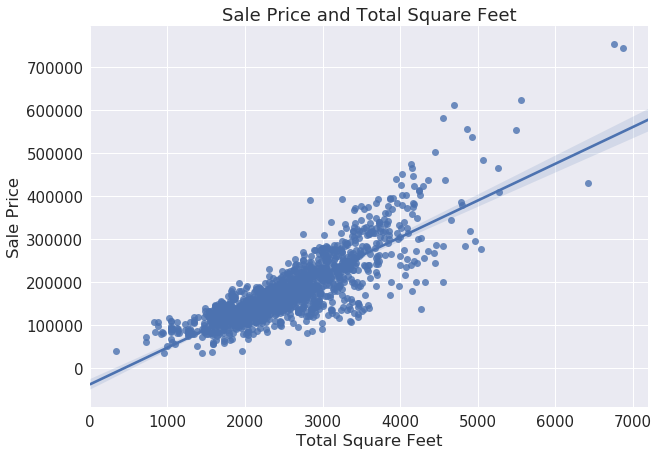

In [74]:
sns.set(color_codes=True)
plt.figure(figsize=(10,7))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
sns.set(font_scale = 1.5)
ax = sns.regplot(x='TotalSF', y='SalePrice', data=df)
ax.set(ylabel='Sale Price', 
       xlabel='Total Square Feet', 
       title='Sale Price and Total Square Feet')

In [80]:
print('Most Important Features:')
corr = df.corr()
corr.sort_values(['SalePrice'], ascending = False, inplace = True)
print(corr.SalePrice)

Most Important Features:
SalePrice        1.000000
TotalSF          0.832877
OverallQual      0.795774
GrLivArea        0.734968
TotalBsmtSF      0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
FullBath         0.562165
TotRmsAbvGrd     0.537769
YearBuilt        0.523608
YearRemodAdd     0.507717
Fireplaces       0.469862
BsmtFinSF1       0.409384
LotFrontage      0.367921
WoodDeckSF       0.324758
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HalfBath         0.284590
LotArea          0.268179
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
ScreenPorch      0.111415
PoolArea         0.099490
MoSold           0.046124
3SsnPorch        0.044568
BsmtFinSF2      -0.011422
BsmtHalfBath    -0.016881
MiscVal         -0.021203
Id              -0.021673
LowQualFinSF    -0.025625
YrSold          -0.028882
OverallCond     -0.077948
MSSubClass      -0.084276
EnclosedPorch   -0.128646
KitchenAbvGr    -0.135946
Name: SalePri

# Normality

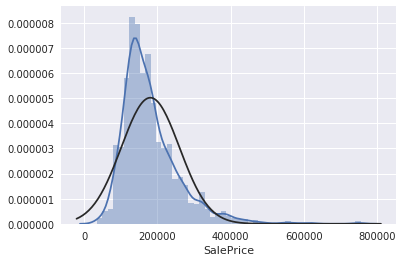

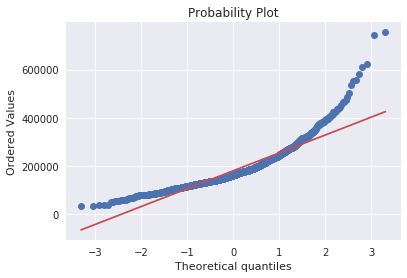

In [38]:
#histogram and normal probability plot
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

In [39]:
#applying log transformation
df['SalePrice'] = np.log(df['SalePrice'])

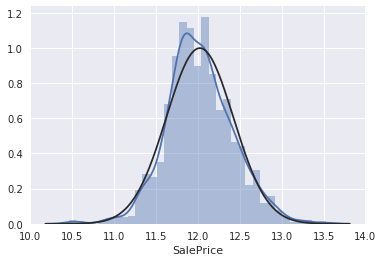

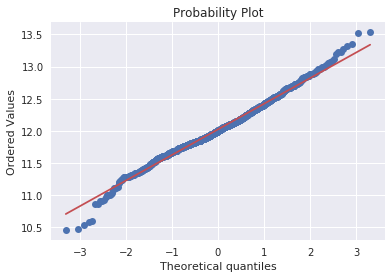

In [40]:
#transformed histogram and normal probability plot
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

In [ ]:
# Get dummy variables so data can be modeled.
df_dummy = pd.